<a href="https://colab.research.google.com/github/varunchandra10/Datamining_theory_algo_implementation/blob/main/Exploratory_Data_Analysis/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploraroty Data Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step-1: Load the dataset

In [3]:
df = pd.read_csv('/content/sample_data/spending_score.csv')
df.head()

,Age,Education,City,Income,SpendingScore
0,Senior,MastersDegree,Miami,118051.61,71.50
1,Adult,PhD,Boston,121790.52,34.25
2,Adult,PhD,NaN,38182.68,2.82
3,Adult,AssociateDegree,Austin,85123.77,78.34
4,NaN,MastersDegree,New York,109113.65,26.72


Step-2: Dataset overview

In [7]:
print("Shape of dataset:", df.shape)

print("\nColumn Info:")
print(df.info())

print("\nMissing values in each column")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

print("\nUnique values in each column:")
for col in df.columns:
  print(f"{col}:{df[col].unique()}")
  print()

Shape of dataset: (1000, 5)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            900 non-null    object 
 1   Education      950 non-null    object 
 2   City           950 non-null    object 
 3   Income         920 non-null    float64
 4   SpendingScore  930 non-null    float64
dtypes: float64(2), object(3)
memory usage: 39.2+ KB
None

Missing values in each column
Age              100
Education         50
City              50
Income            80
SpendingScore     70
dtype: int64

Summary Statistics:
              Income  SpendingScore
count     920.000000     930.000000
mean    90234.007304      50.234839
std     35705.279790      29.066718
min     30020.120000       0.000000
25%     58444.892500      25.227500
50%     89463.860000      50.915000
75%    122425.127500      75.875000
max    149495.780000      99.

# **Univariate Analysis:**
- Explores each variable in a data set, separately
- For Numerical Attributes: shape, central tendency, spread of data
- For Categorical/Nomial Attributes: Frequency counts and Bar plots

In [20]:
# Frequency count for attributes (Nominal)
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue Counts for {col}:\n{df[col].value_counts()}")


Value Counts for Age:
Age
YoungAdult    286
Adult         284
Senior        271
Teen           59
Name: count, dtype: int64

Value Counts for Education:
Education
BachelorsDegree    208
HighSchool         194
PhD                194
AssociateDegree    180
MastersDegree      174
Name: count, dtype: int64

Value Counts for City:
City
New York         128
Boston           127
Austin           121
Chicago          117
San Francisco    117
Miami            115
Seattle          114
Los Angeles      111
Name: count, dtype: int64



Attribute: Age
Missing values: 100
Unique values (up to 10): ['Senior' 'Adult' 'YoungAdult' 'Teen'] 
Detected Type: Nominal / Categorical
Visualizations: Bar Chart, Pie Chart


<ipython-input-21-f27bfa1bd54e>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=df[col].value_counts().index)


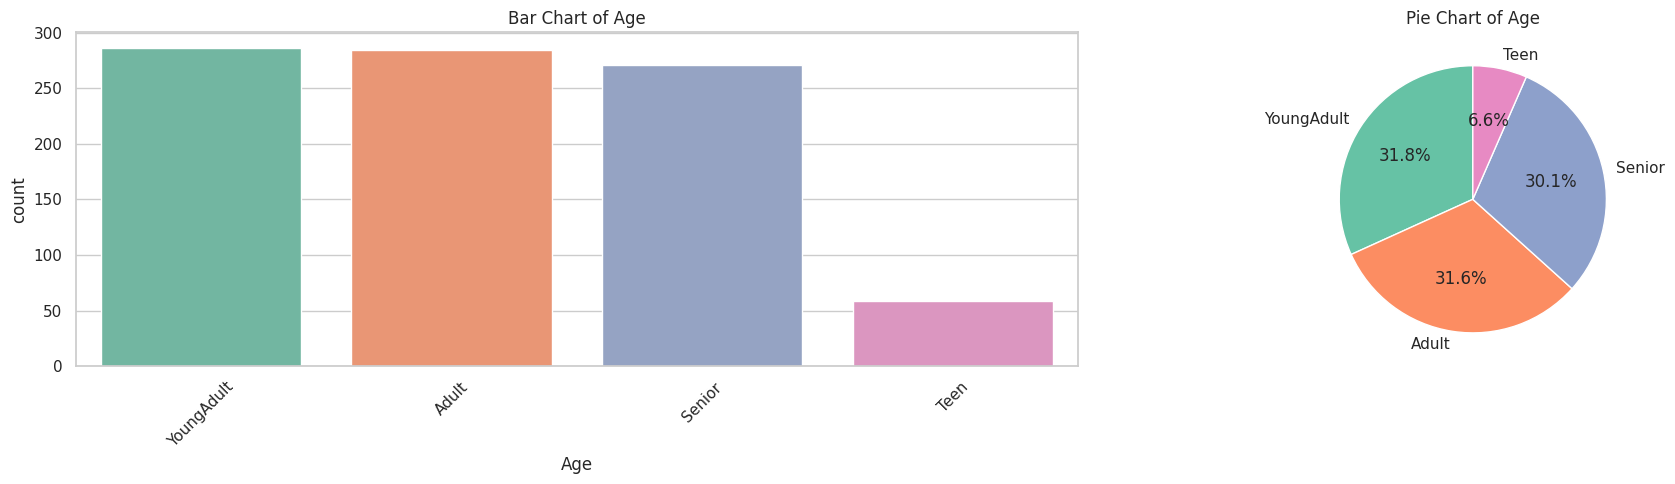


Attribute: Education
Missing values: 50
Unique values (up to 10): ['MastersDegree' 'PhD' 'AssociateDegree' 'HighSchool' 'BachelorsDegree'] 
Detected Type: Nominal / Categorical
Visualizations: Bar Chart, Pie Chart


<ipython-input-21-f27bfa1bd54e>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=df[col].value_counts().index)


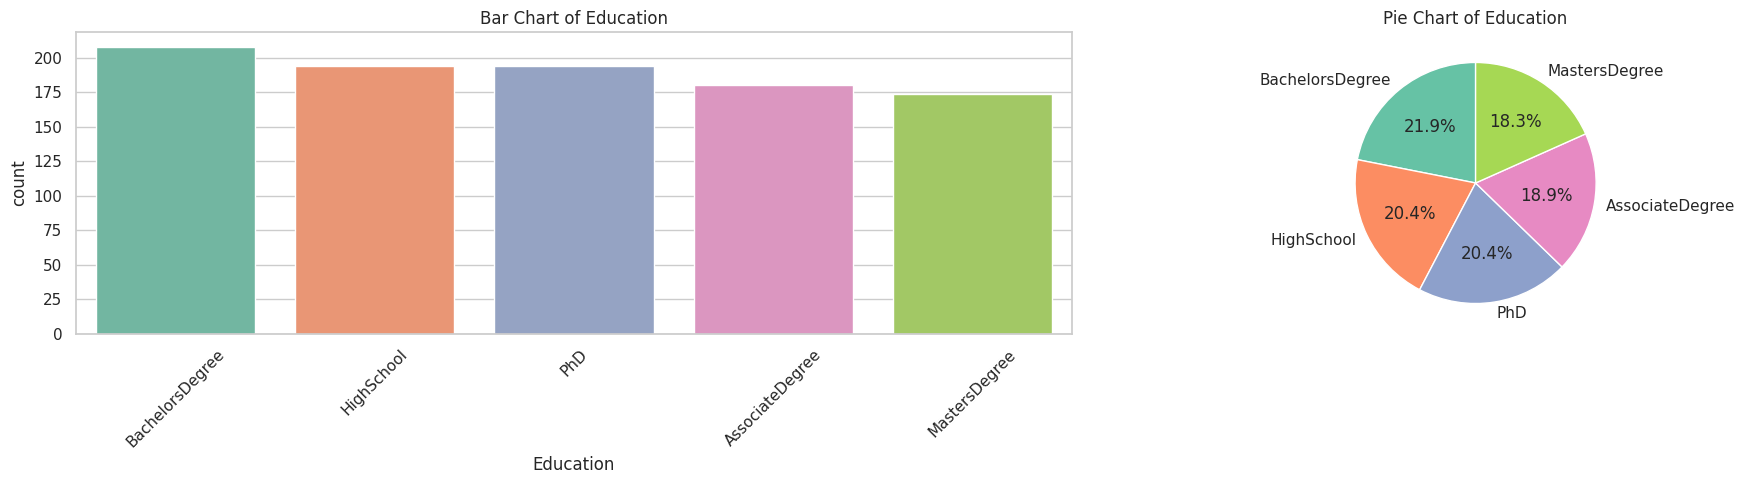


Attribute: City
Missing values: 50
Unique values (up to 10): ['Miami' 'Boston' 'Austin' 'New York' 'Chicago' 'San Francisco' 'Seattle'
 'Los Angeles'] 
Detected Type: Nominal / Categorical
Visualizations: Bar Chart, Pie Chart


<ipython-input-21-f27bfa1bd54e>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=df[col].value_counts().index)


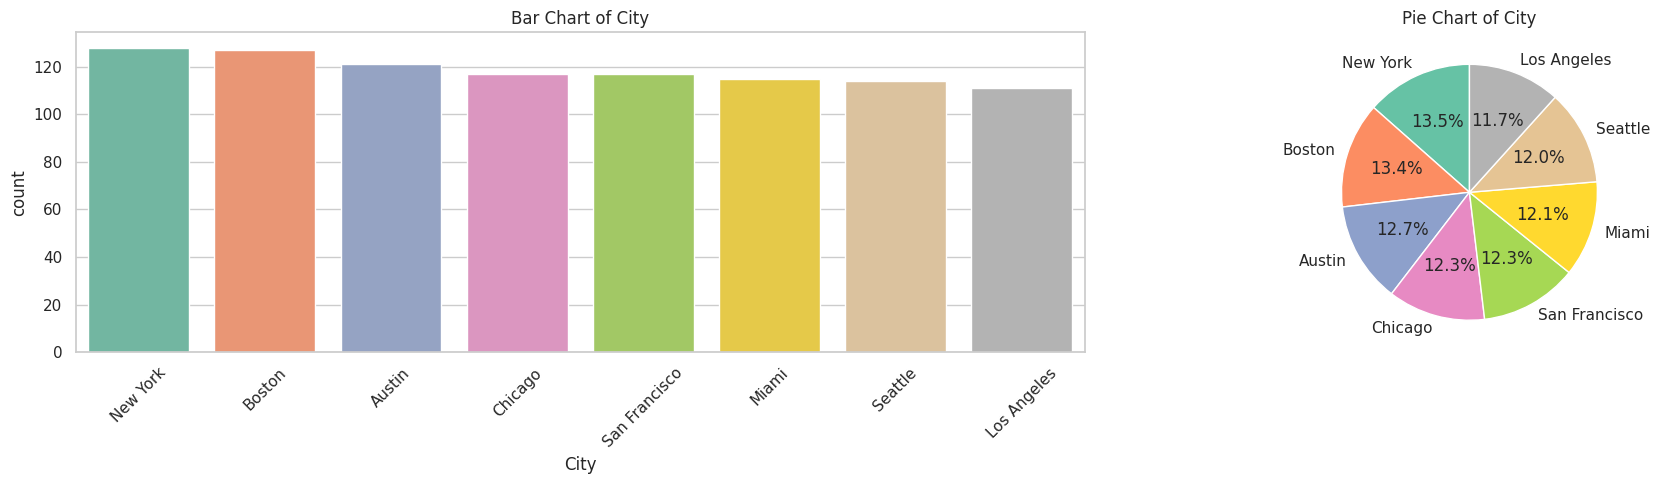


Attribute: Income
Missing values: 80
Unique values (up to 10): [118051.61 121790.52  38182.68  85123.77 109113.65  58724.35  66007.
 145751.36  61911.38  37542.2 ] ...
Detected Type: Numerical
Visualizations: Histogram, Boxplot, KDE, Violinplot


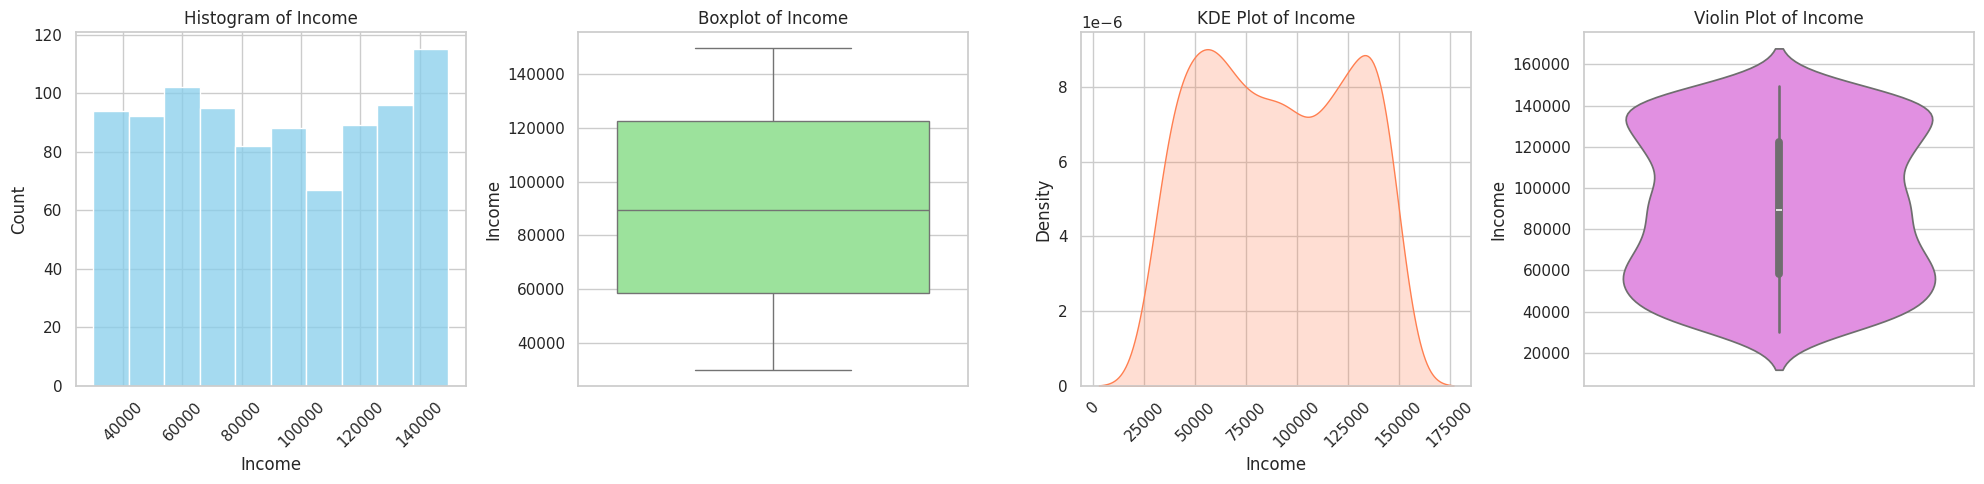


Attribute: SpendingScore
Missing values: 70
Unique values (up to 10): [71.5  34.25  2.82 78.34 26.72 33.42 36.84 90.37 24.18 97.66] ...
Detected Type: Numerical
Visualizations: Histogram, Boxplot, KDE, Violinplot


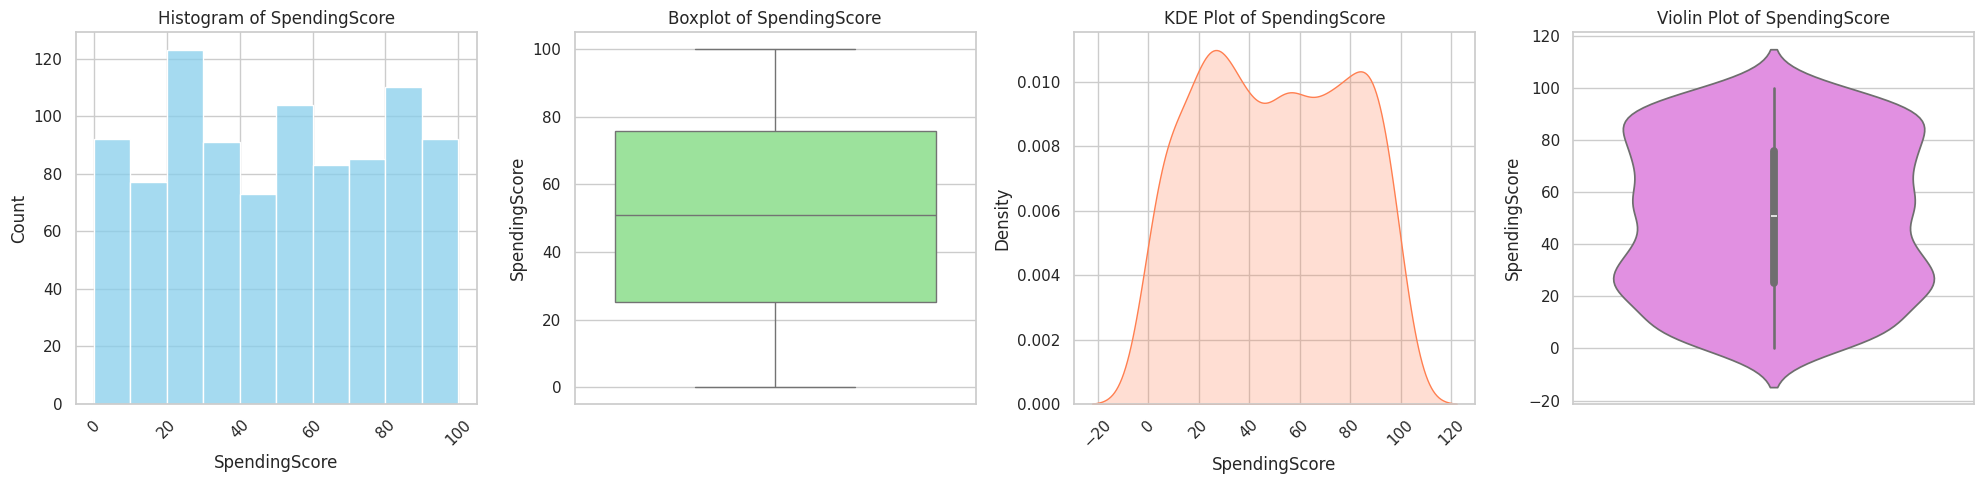

In [21]:
# Set styles
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

for col in df.columns:
    print(f"\nAttribute: {col}")
    print(f"Missing values: {df[col].isnull().sum()}")
    print(f"Unique values (up to 10): {df[col].dropna().unique()[:10]} {'...' if df[col].nunique() > 10 else ''}")

    # Check if the attribute is numerical
    if pd.api.types.is_numeric_dtype(df[col]):
        print("Detected Type: Numerical")
        print("Visualizations: Histogram, Boxplot, KDE, Violinplot")

        plt.figure(figsize=(20, 5))

        # Histogram
        plt.subplot(1, 4, 1)
        sns.histplot(df[col].dropna(), bins=10, kde=False, color='skyblue')
        plt.title(f"Histogram of {col}")
        plt.xticks(rotation=45)

        # Boxplot
        plt.subplot(1, 4, 2)
        sns.boxplot(y=df[col], color='lightgreen')
        plt.title(f"Boxplot of {col}")

        # KDE Plot
        plt.subplot(1, 4, 3)
        sns.kdeplot(df[col].dropna(), fill=True, color='coral')
        plt.title(f"KDE Plot of {col}")
        plt.xticks(rotation=45)

        # Violin Plot
        plt.subplot(1, 4, 4)
        sns.violinplot(y=df[col], color='violet')
        plt.title(f"Violin Plot of {col}")

        plt.tight_layout()
        plt.show()

    else:
        print("Detected Type: Nominal / Categorical")
        print("Visualizations: Bar Chart", end='')

        unique_vals = df[col].nunique()

        plt.figure(figsize=(20, 5))

        # Bar Chart
        plt.subplot(1, 2, 1)
        sns.countplot(x=col, data=df, palette="Set2", order=df[col].value_counts().index)
        plt.title(f"Bar Chart of {col}")
        plt.xticks(rotation=45)

        # Pie Chart (only if unique values are <= 10)
        if unique_vals <= 10:
            print(", Pie Chart")
            plt.subplot(1, 2, 2)
            df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
            plt.title(f"Pie Chart of {col}")
            plt.ylabel('')
        else:
            print("Skipped Pie Chart: Too many categories")

        plt.tight_layout()
        plt.show()


# **Multivariate Analysis :**
- Explores relationships between two or more variables simultaneously.
- Helps identify patterns, correlations, dependencies, and interactions among features.
- Uses visual tools like : Heatmaps, Scatter plots, Pairplots, and
- Statistical measures like: Correlation coefficients and VIF.

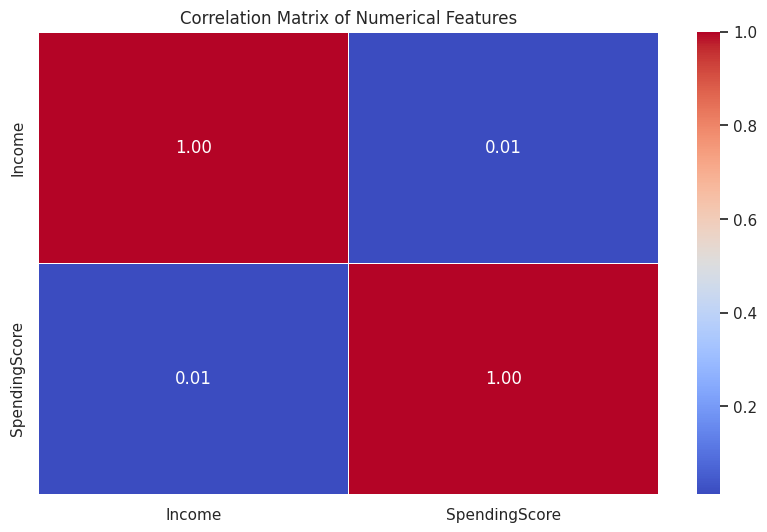

In [22]:
# Step 1: Select numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Correlation Matrix
correlation_matrix = numeric_df.corr()

# Step 3: Heatmap Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


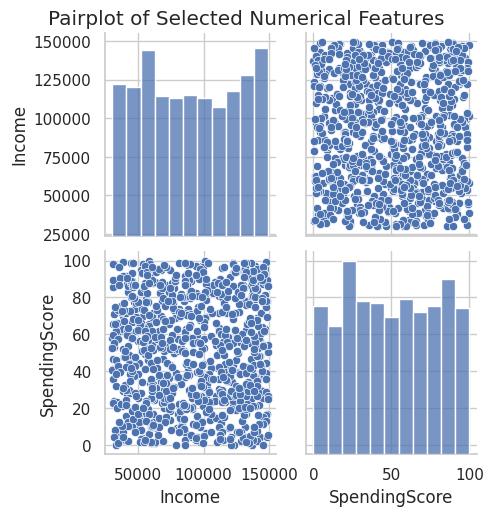

In [23]:
# Step 1: Select all numerical features dynamically
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Create Pairplot
sns.pairplot(numeric_df)
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

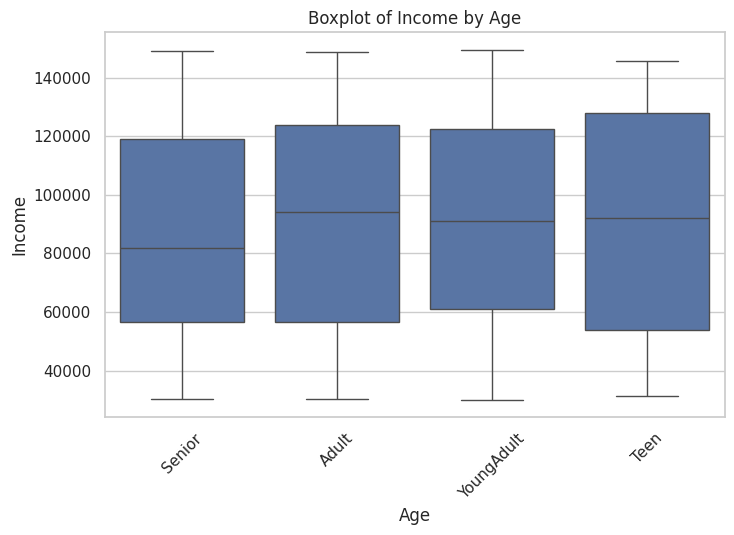

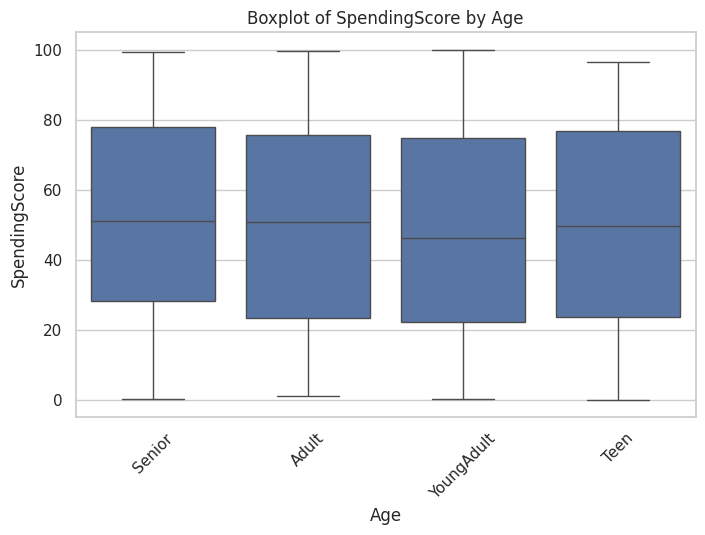

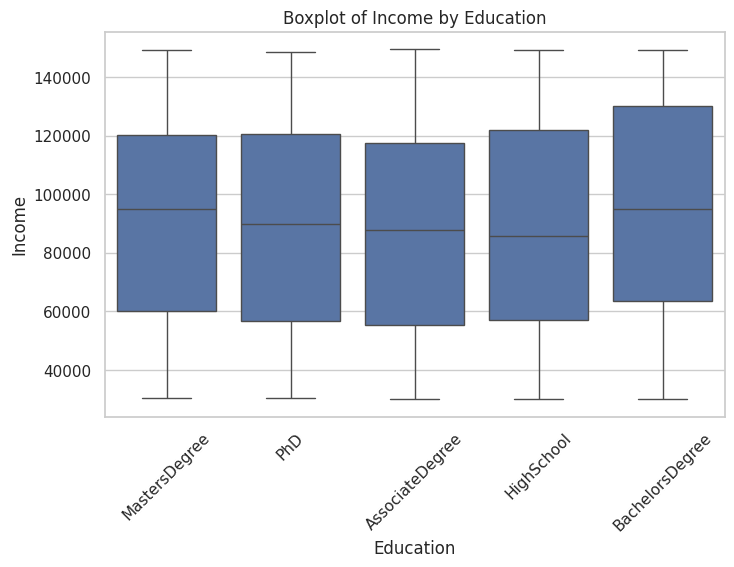

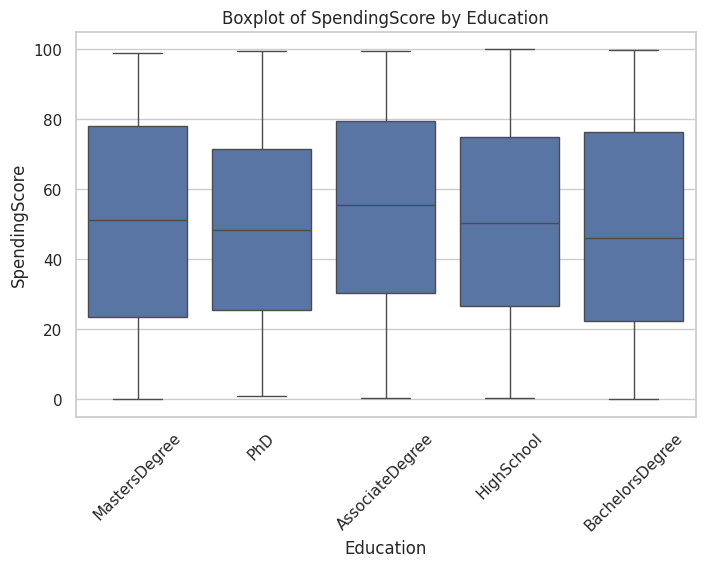

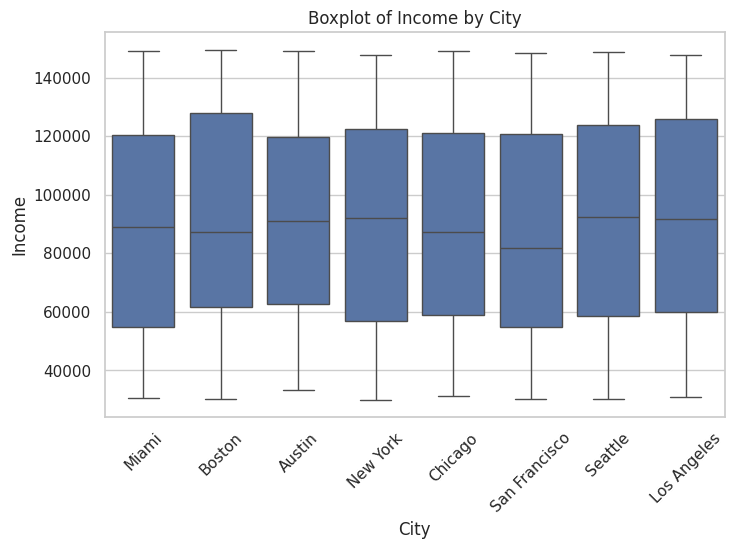

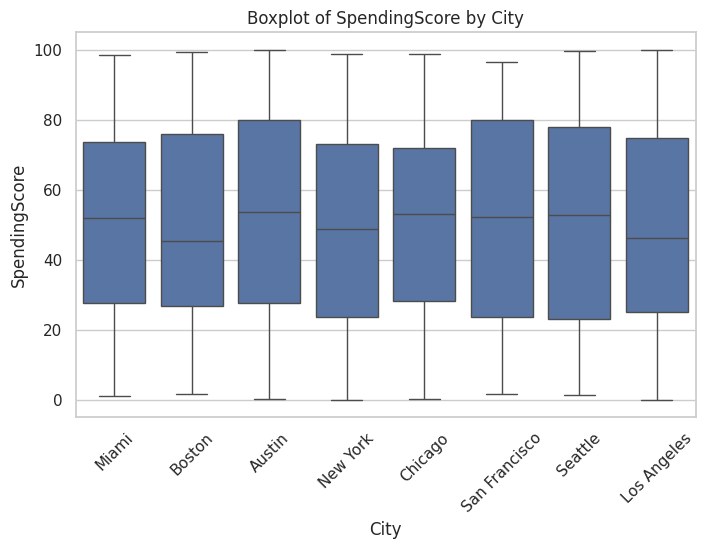

In [25]:
# Step 1: Identify categorical variables dynamically
categorical_cols = df.select_dtypes(include='object').columns

# Step 2: Plot Boxplot for each categorical column vs numerical columns
for col in categorical_cols:
    # Loop over numerical columns for comparison
    for num_col in numeric_df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=col, y=num_col, data=df)
        plt.title(f"Boxplot of {num_col} by {col}")
        plt.xticks(rotation=45)
        plt.show()
        print()

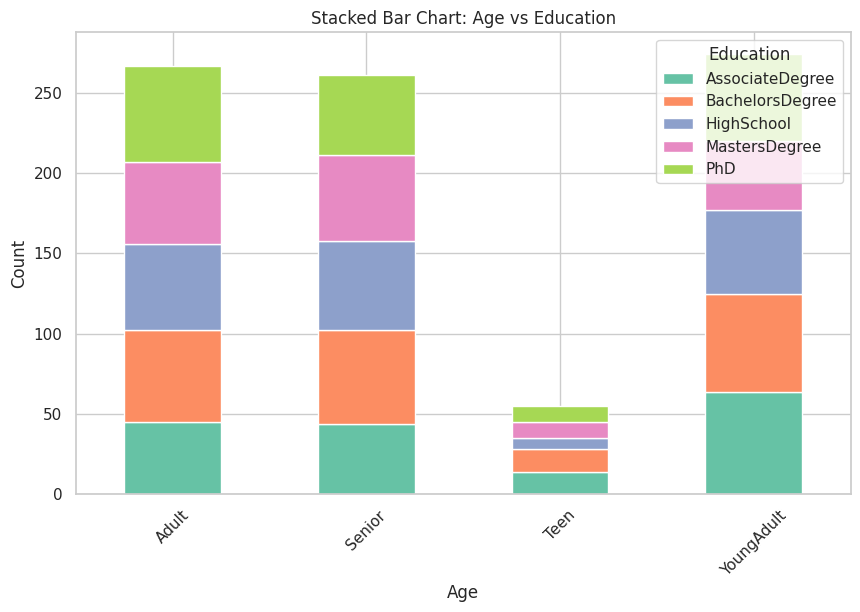

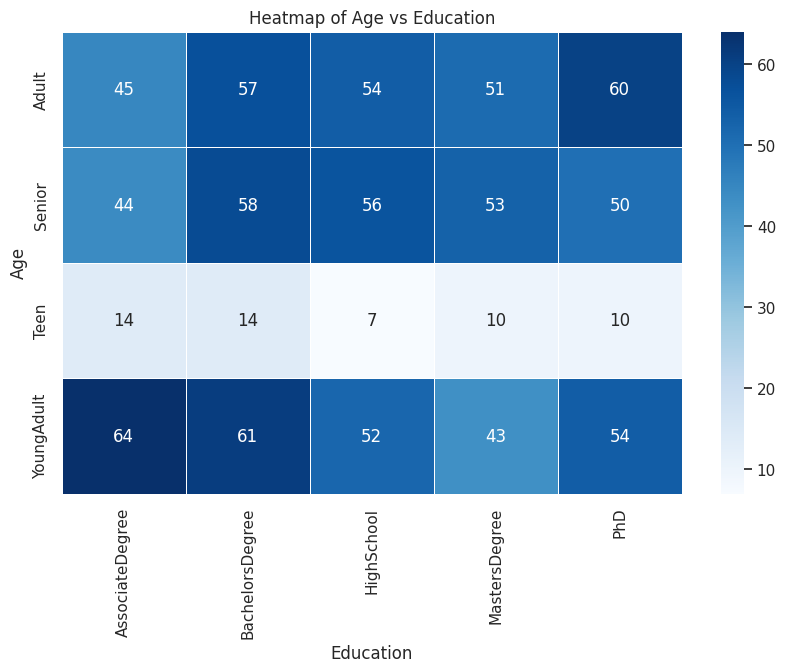

In [27]:
# Step 1: Identify two categorical variables dynamically
categorical_cols = df.select_dtypes(include='object').columns

# Step 2: Create a crosstab to see the relationship between two categorical columns
# Here, we pick the first two categorical columns (you can adjust as needed)
if len(categorical_cols) >= 2:
    crosstab_result = pd.crosstab(df[categorical_cols[0]], df[categorical_cols[1]])

    # Step 3: Plot Stacked Bar Chart
    crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('Set2'))
    plt.title(f"Stacked Bar Chart: {categorical_cols[0]} vs {categorical_cols[1]}")
    plt.xlabel(categorical_cols[0])
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print()

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_result, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title(f"Heatmap of {categorical_cols[0]} vs {categorical_cols[1]}")
plt.xlabel(categorical_cols[1])
plt.ylabel(categorical_cols[0])
plt.show()

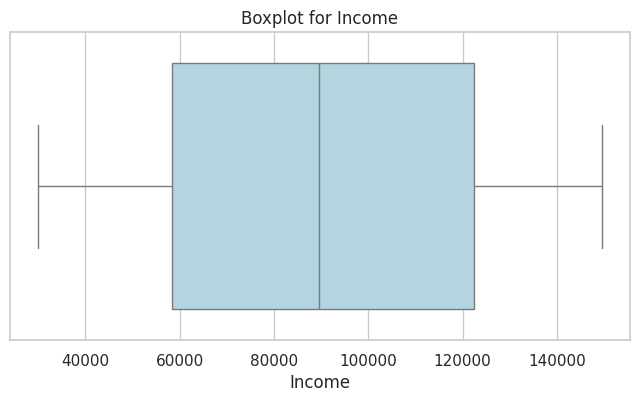

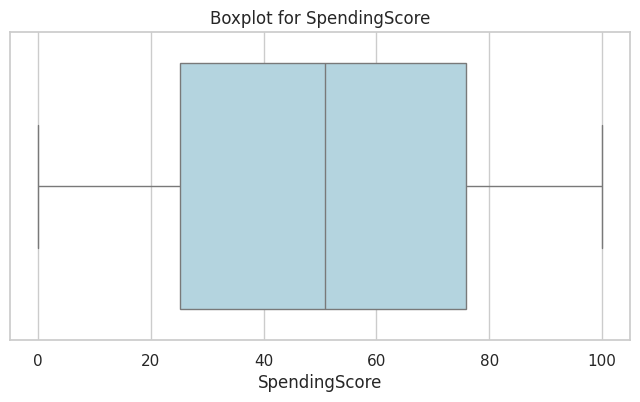


Outliers detected using IQR method:
Income: No outliers detected.
SpendingScore: No outliers detected.


In [30]:
# Boxplot for each numerical column
for col in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numeric_df[col], color='lightblue')
    plt.title(f"Boxplot for {col}")
    plt.show()

# IQR Method (Statistical)
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculate Q1, Q3, and IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define the outlier thresholds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outliers
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

    return outliers

# Detect outliers
outliers = detect_outliers_iqr(numeric_df)

# Display the outliers
print("\nOutliers detected using IQR method:")
for col, indices in outliers.items():
    if indices:
        print(f"{col}: {len(indices)} outliers detected.")
    else:
        print(f"{col}: No outliers detected.")

